# 1er livrable : Pré traitement
### Préparation de l'environnement

In [1]:
from PIL import Image
import numpy as np

JPEG (528, 297) RGB


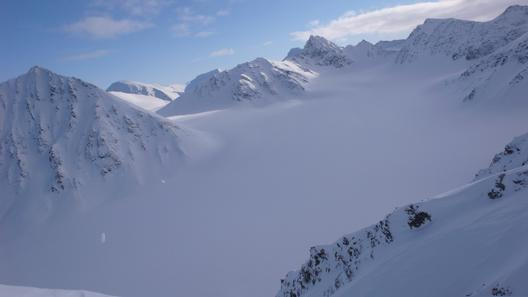

In [2]:
image = Image.open("H:\Desktop\ING3\TI\TI_Project\Images\Images\\2007041612_cam01p.jpg")
print(image.format, image.size, image.mode)
image

#### Les patches seront de taille 33, le plus grand PGCD entre 528 et 297. Toutefois, on peut prendre quasiment n'importe quelle taille de batch, sans perdre de pixel, dans ce code.

In [3]:
patch_size = 33 # patch size

#### Fonction d'extraction des patches dans une images :

In [4]:


def extract_patches(image, patch_size):
    width, height = image.size
    patches = []

    # Calculate the number of patches in each dimension
    num_patches_x = width // patch_size
    num_patches_y = height // patch_size

    # Loop through each patch
    for j in range(num_patches_y + 1):
        for i in range(num_patches_x + 1):
            # Calculate the coordinates of the patch
            x1 = i * patch_size
            y1 = j * patch_size
            x2 = min(x1 + patch_size, width)
            y2 = min(y1 + patch_size, height)

            # Extract the patch
            patch = image.crop((x1, y1, x2, y2))
            patches.append(patch)

    return patches

def patch2Vector(patch):
    patch_array = np.array(patch)
    return patch_array.flatten()



def vector2pacth(patch,pheight,pwidth,patch_size):
  if pheight != patch_size or pwidth != patch_size:
      patch = patch[:pheight*pwidth*3].reshape(pheight, pwidth, 3)
      patch_image = Image.fromarray(patch.astype('uint8')).convert("RGB")
  else:
      patch = patch.reshape(patch_size, patch_size, 3)
      patch_image = Image.fromarray(patch.astype('uint8')).convert("RGB")
  return patch_image

# permet de reconstruire un image a partir des patchs


def reconstImage(vector_patched, patch_size, img_size):
    image_reconstructed = Image.new("RGB", img_size)
    width, height = img_size
    patch_index = 0

    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            # Extract the patch from the list
            patch = vector_patched[patch_index]

            # Calculate the bounding box for pasting the patch
            box = (x, y, x + patch_size, y + patch_size)

            # If the patch size doesn't evenly divide the image size, adjust the box
            if x + patch_size > width or y + patch_size > height:
                patch_width = min(patch_size, width - x)
                patch_height = min(patch_size, height - y)
                box = (x, y, x + patch_width, y + patch_height)
                patch_image = vector2pacth(patch,patch_height,patch_width,patch_size)

            else:
                patch_image = vector2pacth(patch,patch_size,patch_size,patch_size)

            # Paste the patch onto the reconstructed image
            image_reconstructed.paste(patch_image, box)

            # Move to the next patch
            patch_index += 1

    return image_reconstructed



#### Patched_image sera donc composé de 144 patches de l'image initiale (16*9)

In [5]:
patched_image = extract_patches(image, patch_size)

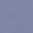

In [6]:
patched_image[143]

### Transformation en vecteurs colonnes :

In [8]:
vectorised_img = [patch2Vector(patch) for patch in patched_image]
def supprimer_listes_nulles(liste):
    # Convertir les numpy arrays en listes de Python
    liste = [arr.tolist() for arr in liste]
    # Utilisation de la fonction filter() pour filtrer les listes vides
    liste_filtree = list(filter(None, liste))
    # Convertir les listes en numpy arrays
    liste_filtree = [np.array(arr) for arr in liste_filtree]
    return liste_filtree


vectorised_img = supprimer_listes_nulles(vectorised_img)
vectorised_img[143]

array([ 89, 105, 139, ...,  87, 101, 136])

Version a essayer qui fonctionne pour quasiment n'importe quelle taille de batch, j'ai un probléme pour qqu'une comme 22, je ne sais pas pourquoi..

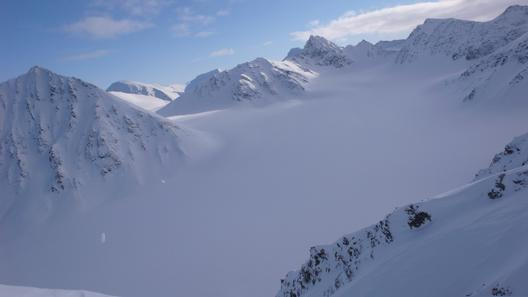

In [9]:
reconstructed_image = reconstImage(vectorised_img, patch_size, image.size)
reconstructed_image